In [70]:
import pandas as pd

# Load dataset and take the first 10,000 rows
file_path = r'C:\Users\USER\Desktop\Reviews.csv'
df = pd.read_csv(file_path)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Step 1: Data Preparation

# Load dataset and take the first 10,000 rows
df = df.head(10000)[['Text', 'Score']]

# Convert 'Score' values to binary (positive/negative)
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Split text into words
df['Text'] = df['Text'].astype(str).str.split()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join words back for TF-IDF vectorization
df['Text'] = df['Text'].apply(lambda x: ' '.join(x))

max_features = 5000
max_len = 100

# 初始化 Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Text'])

# 将文本转换为整数序列
sequences = tokenizer.texts_to_sequences(df['Text'])

# 填充序列，使其长度相同
X = pad_sequences(sequences, maxlen=max_len)

y = df['Score'].values

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
# CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(14, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# 编译模型
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
# cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

cnn_history


Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7639 - loss: 0.5464 - val_accuracy: 0.7600 - val_loss: 0.4069
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8385 - loss: 0.3570 - val_accuracy: 0.8450 - val_loss: 0.3706
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9176 - loss: 0.2265 - val_accuracy: 0.8550 - val_loss: 0.3726
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9562 - loss: 0.1154 - val_accuracy: 0.8512 - val_loss: 0.4523
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9838 - loss: 0.0606 - val_accuracy: 0.8450 - val_loss: 0.6053


In [72]:

# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

lstm_history


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.7532 - loss: 0.5586 - val_accuracy: 0.8281 - val_loss: 0.3764
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8909 - loss: 0.2611 - val_accuracy: 0.8481 - val_loss: 0.3499
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9381 - loss: 0.1689 - val_accuracy: 0.8531 - val_loss: 0.3773
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9668 - loss: 0.1091 - val_accuracy: 0.8500 - val_loss: 0.4465
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9783 - loss: 0.0671 - val_accuracy: 0.8425 - val_loss: 0.5278


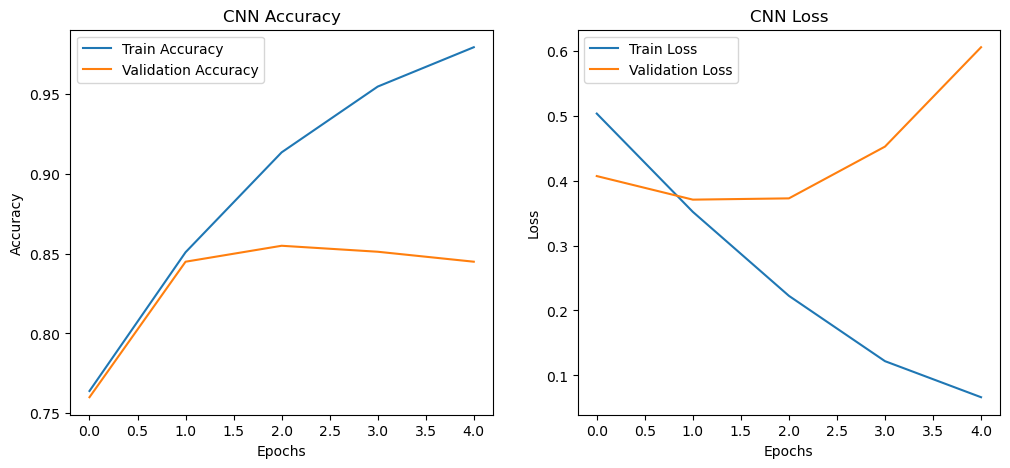

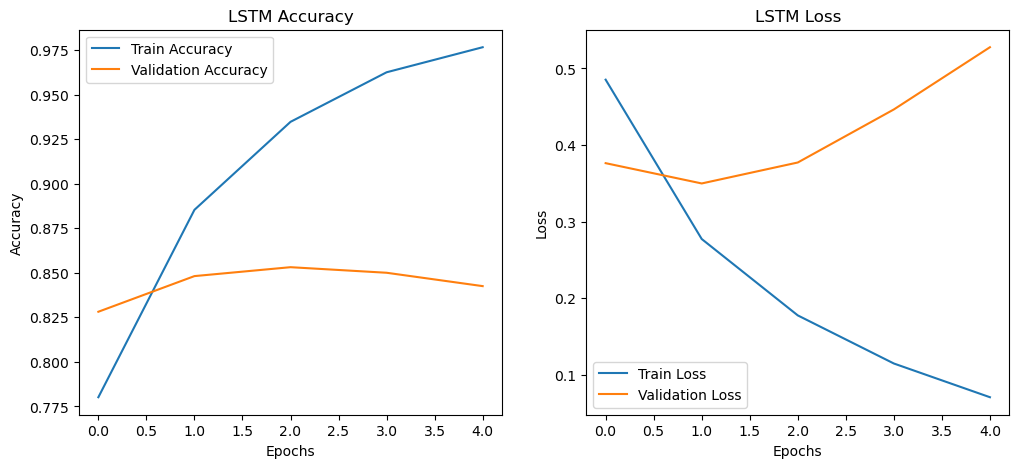

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8339 - loss: 0.7021
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8361 - loss: 0.5522


'CNN Test Accuracy: 0.83'

In [73]:

# Plot CNN Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Plot LSTM Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test)


f"CNN Test Accuracy: {cnn_test_accuracy:.2f}"
#print(f"CNN Test Accuracy: {cnn_test_accuracy:.2f}")
#print(f"LSTM Test Accuracy: {lstm_test_accuracy:.2f}")

In [74]:
f"LSTM Test Accuracy: {lstm_test_accuracy:.2f}"

'LSTM Test Accuracy: 0.84'